In [1]:
import pandas as pd
import numpy as np
import json
import os


In [2]:
data_path = "/Users/veerr_89/Work/CourseCode/STAT-443 Professional Statistics/Consulting/data/TurbineGroup2.csv"

df = pd.read_csv(data_path)
df = df.apply(pd.to_numeric, errors="ignore")

print(df.shape)
df.head()


(14310, 11)


/var/folders/n5/50bl5l7j7nx717mns6lylg800000gn/T/ipykernel_64511/1818353880.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,9.3779,1020.1,90.262,2.3927,19.166,1043.6,541.16,110.16,10.564,9.3472,98.741
1,9.2985,1019.9,89.934,2.3732,19.119,1039.9,538.94,109.23,10.572,11.0160,104.290
2,9.1337,1019.8,89.868,2.3854,19.178,1041.0,539.47,109.62,10.543,10.7500,103.470
3,8.9715,1019.3,89.490,2.3825,19.180,1037.1,536.89,108.88,10.458,12.2870,108.810
4,9.0157,1019.1,89.099,2.4044,19.206,1043.5,541.25,110.09,10.464,9.8229,100.020


In [3]:
artifacts_path = "/Users/veerr_89/Work/CourseCode/STAT-443 Professional Statistics/Consulting/artifacts/"

histMinMax_path = os.path.join(artifacts_path, "histMinMax.json")
bandMedians_path = os.path.join(artifacts_path, "bandMedians.json")

with open(histMinMax_path, "r") as f:
    histMinMax = json.load(f)

with open(bandMedians_path, "r") as f:
    bandMedians = json.load(f)

histMinMax, bandMedians


({'TIT': {'min': 1002.9, 'max': 1100.9},
  'TAT': {'min': 511.04, 'max': 550.6},
  'CDP': {'min': 9.8518, 'max': 14.867},
  'GTEP': {'min': 17.939, 'max': 36.95},
  'AFDP': {'min': 2.1517, 'max': 6.9779},
  'AT': {'min': 0.28985, 'max': 34.189},
  'AP': {'min': 989.38, 'max': 1031.4},
  'AH': {'min': 25.987, 'max': 100.19},
  'TEY': {'min': 100.03, 'max': 172.96}},
 {'full': {'TIT': 1083.2,
   'TAT': 549.91,
   'CDP': 11.9255,
   'GTEP': 25.075,
   'AFDP': 3.80455,
   'AT': 17.678,
   'AP': 1011.9,
   'AH': 84.2885,
   'TEY': 133.53},
  '130_136': {'TIT': 1086.0,
   'TAT': 549.99,
   'CDP': 11.973,
   'GTEP': 25.186,
   'AFDP': 3.6592,
   'AT': 16.519,
   'AP': 1011.9,
   'AH': 84.592,
   'TEY': 133.94},
  '160p': {'TIT': 1100.0,
   'TAT': 529.0699999999999,
   'CDP': 14.0545,
   'GTEP': 33.2505,
   'AFDP': 4.17135,
   'AT': 8.72355,
   'AP': 1017.75,
   'AH': 81.8725,
   'TEY': 162.67}})

In [4]:
def assign_band(tey):
    if tey < 130:
        return "<130"
    elif 130 <= tey <= 136:
        return "130_136"
    elif 136 < tey < 160:
        return "136_160"
    else:
        return "160_plus"

df["TEY_band"] = df["TEY"].apply(assign_band)

df["TEY_band"].value_counts()


TEY_band
<130        5422
130_136     5199
136_160     3011
160_plus     678
Name: count, dtype: int64

In [5]:
df_full = df.copy()
df_130 = df[df["TEY_band"] == "130_136"].copy()
df_160 = df[df["TEY_band"] == "160_plus"].copy()

df_full.shape, df_130.shape, df_160.shape


((14310, 12), (5199, 12), (678, 12))

In [6]:
avg_full_current = df_full["NOX"].mean()
avg_130_current = df_130["NOX"].mean()
avg_160_current = df_160["NOX"].mean()

avg_full_current, avg_130_current, avg_160_current


(np.float64(65.03530831586303),
 np.float64(66.73092113868051),
 np.float64(69.5840383480826))

In [7]:
def filter_by_recommended(df, band_key):
    rec = rec_ranges[band_key]   # recommended windows for this band
    temp = df.copy()

    for param, bounds in rec.items():
        rmin, rmax = bounds

        # Handle CONTROL_LIMIT
        if str(rmin).upper() == "CONTROL_LIMIT":
            rmin = -np.inf

        temp = temp[(temp[param] >= rmin) & (temp[param] <= rmax)]

    return temp


In [8]:
rec_path = "/Users/veerr_89/Work/CourseCode/STAT-443 Professional Statistics/Consulting/recommended_ranges.json"

import json
with open(rec_path, "r") as f:
    rec_ranges = json.load(f)

rec_ranges.keys()


dict_keys(['full', '130_136', '160_plus'])

In [9]:
df_full_rec = filter_by_recommended(df_full, "full")
df_130_rec  = filter_by_recommended(df_130, "130_136")
df_160_rec  = filter_by_recommended(df_160, "160_plus")


In [10]:
df_full.shape, df_full_rec.shape, df_130.shape, df_130_rec.shape, df_160.shape, df_160_rec.shape


((14310, 12), (3894, 12), (5199, 12), (2306, 12), (678, 12), (427, 12))

In [11]:
avg_full_current = df_full["NOX"].mean()
avg_130_current  = df_130["NOX"].mean()
avg_160_current  = df_160["NOX"].mean()

avg_full_current, avg_130_current, avg_160_current


(np.float64(65.03530831586303),
 np.float64(66.73092113868051),
 np.float64(69.5840383480826))

In [12]:
avg_full_rec = df_full_rec["NOX"].mean()
avg_130_rec  = df_130_rec["NOX"].mean()
avg_160_rec  = df_160_rec["NOX"].mean()

avg_full_rec, avg_130_rec, avg_160_rec


(np.float64(62.77791551104262),
 np.float64(65.54255984388551),
 np.float64(67.55883606557377))

In [13]:
full_reduction  = 100 * (avg_full_current - avg_full_rec) / avg_full_current
band130_reduction = 100 * (avg_130_current - avg_130_rec) / avg_130_current
band160_reduction = 100 * (avg_160_current - avg_160_rec) / avg_160_current

full_reduction, band130_reduction, band160_reduction


(np.float64(3.471026528938285),
 np.float64(1.7808255521085095),
 np.float64(2.9104408576836125))

In [14]:
summary = pd.DataFrame({
    "Band": ["Full Model", "130–136", "160+"],
    "Current Avg NOx": [avg_full_current, avg_130_current, avg_160_current],
    "Recommended-Window Avg NOx": [avg_full_rec, avg_130_rec, avg_160_rec],
    "% Reduction": [full_reduction, band130_reduction, band160_reduction]
})

summary


,Band,Current Avg NOx,Recommended-Window Avg NOx,% Reduction
0,Full Model,65.035308,62.777916,3.471027
1,130–136,66.730921,65.542560,1.780826
2,160+,69.584038,67.558836,2.910441


In [15]:
# --------------------------------------------
# 1. Compute the top 5% threshold for each band
# --------------------------------------------

def compute_top5(df):
    thr = df["NOX"].quantile(0.95)
    top5 = df[df["NOX"] >= thr]["NOX"]
    return thr, top5.mean()

full_top5_thr, full_top5_mean = compute_top5(df_full)
b130_top5_thr, b130_top5_mean = compute_top5(df_130)
b160_top5_thr, b160_top5_mean = compute_top5(df_160)

# ----------------------------------------------------
# 2. Compute reduction vs highest NOx (top 5% average)
# ----------------------------------------------------

full_reduction_top5  = 100 * (full_top5_mean - avg_full_rec)  / full_top5_mean
b130_reduction_top5  = 100 * (b130_top5_mean - avg_130_rec)   / b130_top5_mean
b160_reduction_top5  = 100 * (b160_top5_mean - avg_160_rec)   / b160_top5_mean

# ----------------------------------------------------
# 3. Build a clean results table (2 types of reduction)
# ----------------------------------------------------

reduction_summary = pd.DataFrame({
    "Band": ["Full Model", "130–136", "160+"],

    # Current averages
    "Current Avg NOx": [
        avg_full_current, avg_130_current, avg_160_current
    ],

    # Recommended window averages
    "Recommended Avg NOx": [
        avg_full_rec, avg_130_rec, avg_160_rec
    ],

    # Reduction vs Average
    "% Reduction vs Avg": [
        full_reduction, band130_reduction, band160_reduction
    ],

    # High NOx (top 5%) metrics
    "Top 5% Avg NOx": [
        full_top5_mean, b130_top5_mean, b160_top5_mean
    ],

    # Reduction vs High NOx
    "% Reduction vs Highest": [
        full_reduction_top5, b130_reduction_top5, b160_reduction_top5
    ]
})

reduction_summary


,Band,Current Avg NOx,Recommended Avg NOx,% Reduction vs Avg,Top 5% Avg NOx,% Reduction vs Highest
0,Full Model,65.035308,62.777916,3.471027,97.823356,35.825228
1,130–136,66.730921,65.542560,1.780826,87.156850,24.799302
2,160+,69.584038,67.558836,2.910441,83.478676,19.070547


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", font_scale=1.2)


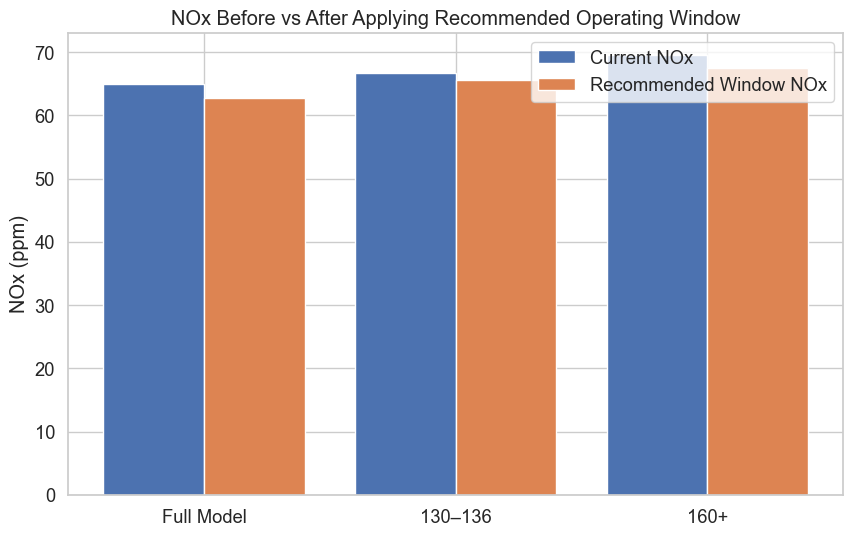

In [17]:
plt.figure(figsize=(10,6))
x = np.arange(len(reduction_summary))

plt.bar(x - 0.2, reduction_summary["Current Avg NOx"], width=0.4, label="Current NOx")
plt.bar(x + 0.2, reduction_summary["Recommended Avg NOx"], width=0.4, label="Recommended Window NOx")

plt.xticks(x, reduction_summary["Band"])
plt.ylabel("NOx (ppm)")
plt.title("NOx Before vs After Applying Recommended Operating Window")
plt.legend()
plt.show()


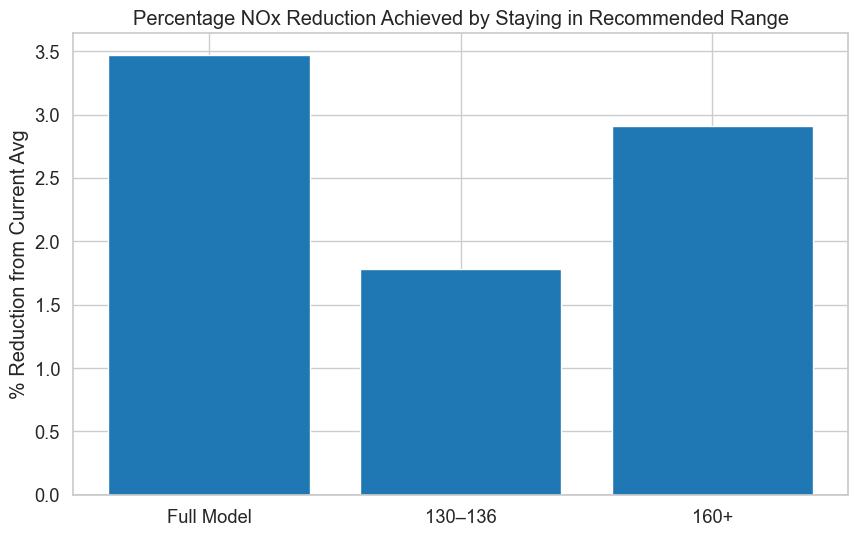

In [18]:
plt.figure(figsize=(10,6))
plt.bar(reduction_summary["Band"], reduction_summary["% Reduction vs Avg"], color="#1f77b4")

plt.axhline(0, color="black", linewidth=1)
plt.ylabel("% Reduction from Current Avg")
plt.title("Percentage NOx Reduction Achieved by Staying in Recommended Range")
plt.show()


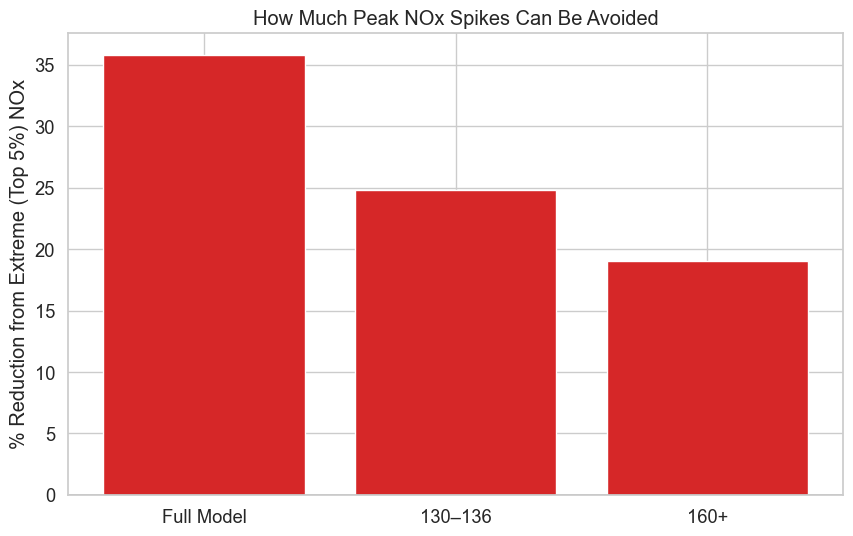

In [19]:
plt.figure(figsize=(10,6))
plt.bar(reduction_summary["Band"], reduction_summary["% Reduction vs Highest"], color="#d62728")

plt.axhline(0, color="black", linewidth=1)
plt.ylabel("% Reduction from Extreme (Top 5%) NOx")
plt.title("How Much Peak NOx Spikes Can Be Avoided")
plt.show()


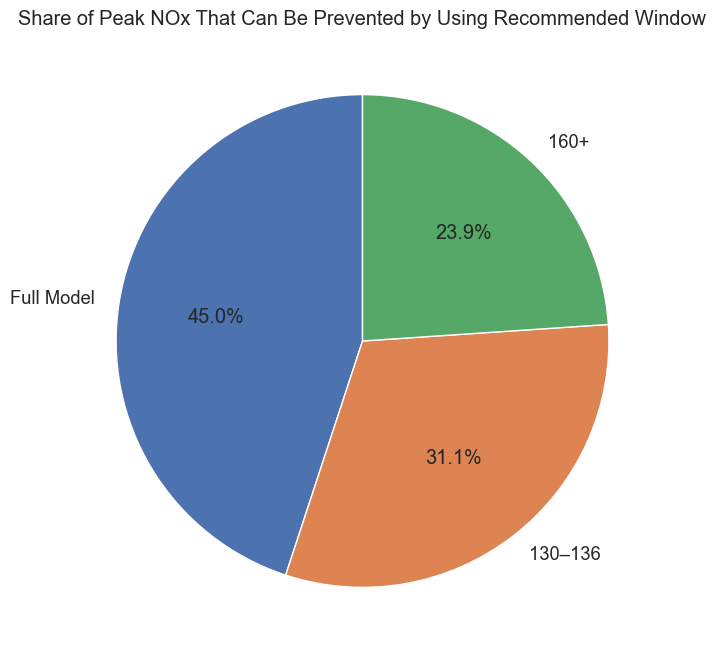

In [20]:
plt.figure(figsize=(8,8))

avoidable = reduction_summary["% Reduction vs Highest"].clip(lower=0)  # negative becomes zero
labels = reduction_summary["Band"]

plt.pie(avoidable, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Share of Peak NOx That Can Be Prevented by Using Recommended Window")
plt.show()


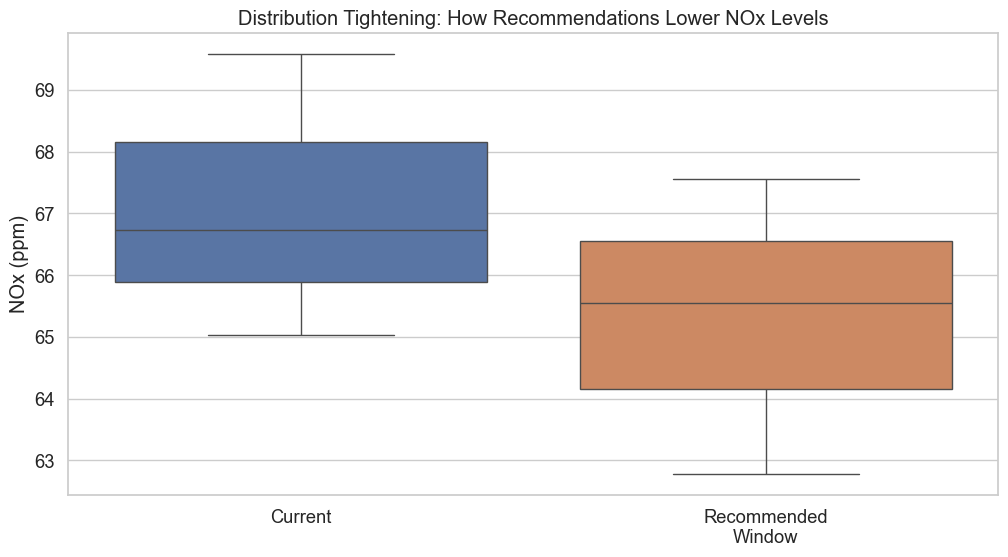

In [21]:
plt.figure(figsize=(12,6))

sns.boxplot(data=[
    reduction_summary["Current Avg NOx"],
    reduction_summary["Recommended Avg NOx"]
])

plt.xticks([0, 1], ["Current", "Recommended\nWindow"])
plt.ylabel("NOx (ppm)")
plt.title("Distribution Tightening: How Recommendations Lower NOx Levels")
plt.show()


In [22]:
df_160 = df[df["TEY_band"] == "160_plus"].copy()


In [23]:
low_cut = df_160["NOX"].quantile(0.40)
df_160_low = df_160[df_160["NOX"] <= low_cut]


In [24]:
params = ["TIT", "TAT", "CDP", "GTEP", "AFDP"]

new_ranges_160 = {}

for p in params:
    vals = df_160_low[p].dropna()
    
    rmin = vals.quantile(0.05)
    rmax = vals.quantile(0.95)

    # TIT special case
    if p == "TIT" and rmin > 1090:
        rmin = "CONTROL_LIMIT"

    new_ranges_160[p] = [rmin, rmax]

new_ranges_160


{'TIT': ['CONTROL_LIMIT', np.float64(1100.1)],
 'TAT': [np.float64(521.78), np.float64(534.8)],
 'CDP': [np.float64(13.884), np.float64(14.465499999999999)],
 'GTEP': [np.float64(32.43), np.float64(35.0305)],
 'AFDP': [np.float64(3.82295), np.float64(4.342700000000001)]}

In [25]:
df_160["NOX"].describe()


count    678.000000
mean      69.584038
std        7.243297
min       39.858000
25%       66.202250
50%       69.690500
75%       73.551250
max       86.538000
Name: NOX, dtype: float64

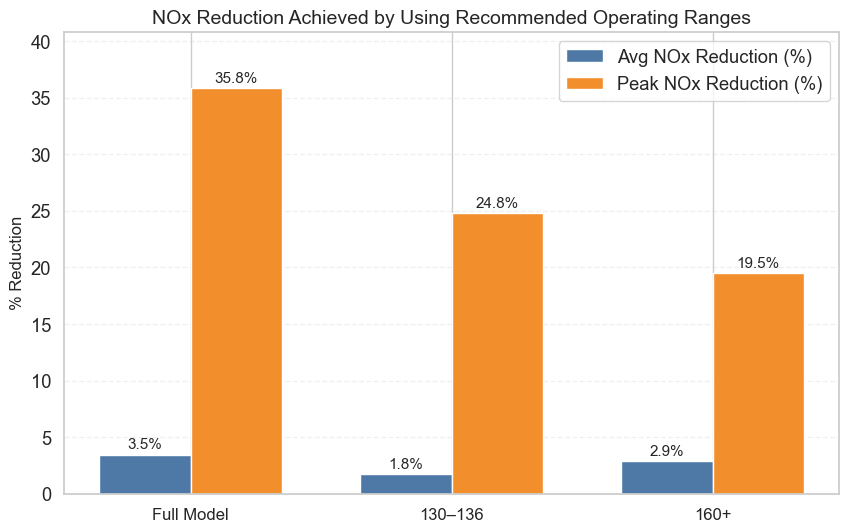

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# NOx reduction results you reported
bands = ["Full Model", "130–136", "160+"]

avg_reduction = [3.47, 1.78, 2.90]        # % reduction in average NOx
peak_reduction = [35.82, 24.80, 19.52]    # % reduction in peak NOx spikes

x = np.arange(len(bands))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, avg_reduction, width, label='Avg NOx Reduction (%)', color='#4e79a7')
plt.bar(x + width/2, peak_reduction, width, label='Peak NOx Reduction (%)', color='#f28e2b')

# Add percentage labels on top of bars
for i, v in enumerate(avg_reduction):
    plt.text(i - width/2, v + 0.5, f"{v:.1f}%", ha='center', fontsize=11)

for i, v in enumerate(peak_reduction):
    plt.text(i + width/2, v + 0.5, f"{v:.1f}%", ha='center', fontsize=11)

plt.title("NOx Reduction Achieved by Using Recommended Operating Ranges", fontsize=14)
plt.ylabel("% Reduction", fontsize=12)
plt.xticks(x, bands, fontsize=12)
plt.ylim(0, max(peak_reduction) + 5)
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


/var/folders/n5/50bl5l7j7nx717mns6lylg800000gn/T/ipykernel_64511/1744676046.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(models, rotation=45, ha="right")
/var/folders/n5/50bl5l7j7nx717mns6lylg800000gn/T/ipykernel_64511/1744676046.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(models, rotation=45, ha="right")


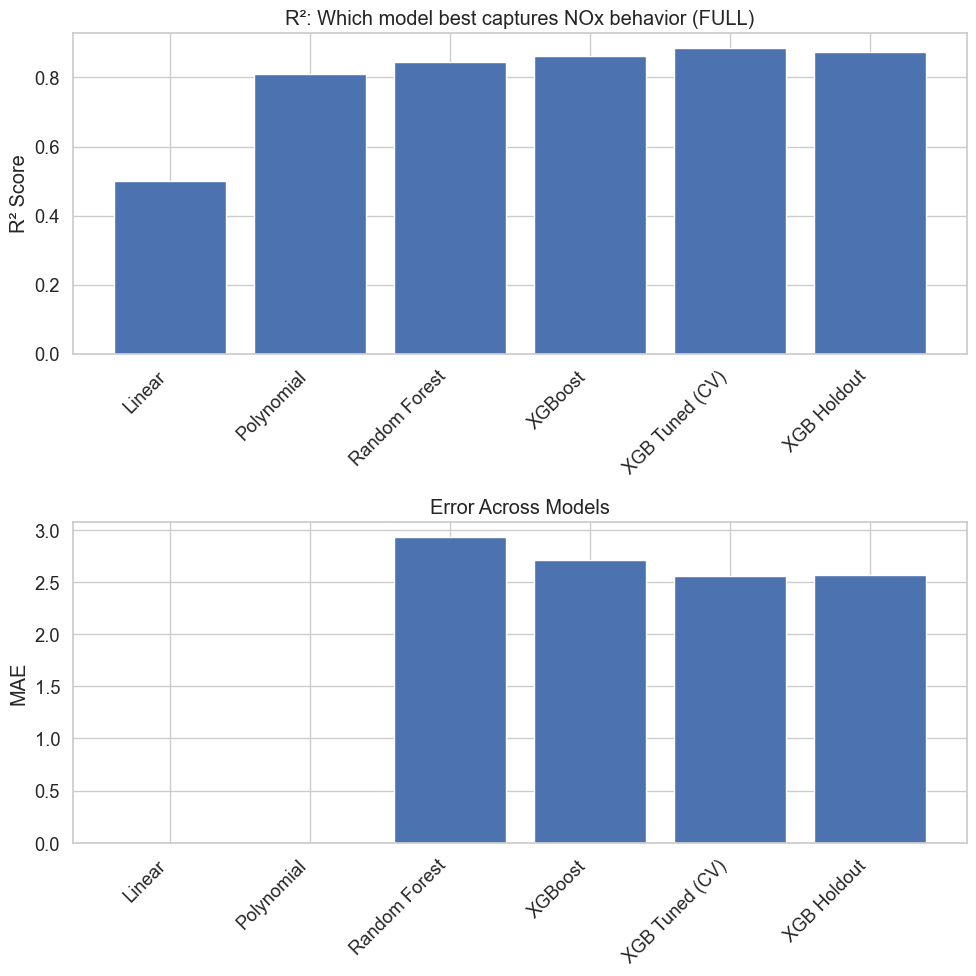

In [29]:
import matplotlib.pyplot as plt

# Data
models = ["Linear", "Polynomial", "Random Forest", "XGBoost", "XGB Tuned (CV)", "XGB Holdout"]
r2 = [0.50, 0.81, 0.846, 0.862, 0.886, 0.874]
mae = [None, None, 2.93, 2.71, 2.558, 2.565]

# Prepare MAE list with numeric values, replacing None with 0 for plotting
mae_plot = [m if m is not None else 0 for m in mae]

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# R² Bar Chart
axs[0].bar(models, r2)
axs[0].set_title("R²: Which model best captures NOx behavior (FULL)")
axs[0].set_ylabel("R² Score")
axs[0].set_xticklabels(models, rotation=45, ha="right")

# MAE Bar Chart
axs[1].bar(models, mae_plot)
axs[1].set_title("Error Across Models")
axs[1].set_ylabel("MAE")
axs[1].set_xticklabels(models, rotation=45, ha="right")

plt.tight_layout()
plt.show()

/var/folders/n5/50bl5l7j7nx717mns6lylg800000gn/T/ipykernel_64511/2782297465.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(models, rotation=45, ha="right")
/var/folders/n5/50bl5l7j7nx717mns6lylg800000gn/T/ipykernel_64511/2782297465.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(models, rotation=45, ha="right")


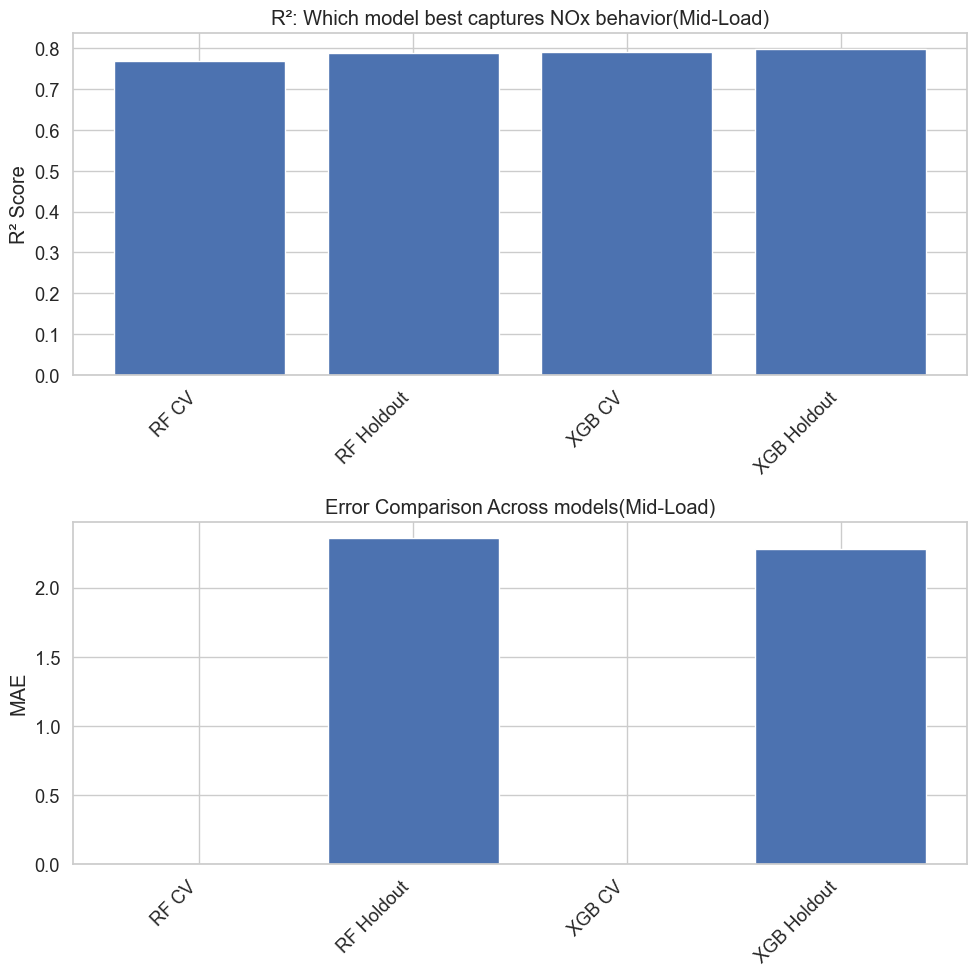

In [30]:
import matplotlib.pyplot as plt

# Data
models = ["RF CV", "RF Holdout", "XGB CV", "XGB Holdout"]
r2 = [0.768, 0.789, 0.791, 0.799]
mae = [0, 2.359, 0, 2.282]  # CV rows have no MAE → plot as 0

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# R² Bar Chart
axs[0].bar(models, r2)
axs[0].set_title("R²: Which model best captures NOx behavior(Mid-Load)")
axs[0].set_ylabel("R² Score")
axs[0].set_xticklabels(models, rotation=45, ha="right")

# MAE Bar Chart
axs[1].bar(models, mae)
axs[1].set_title("Error Comparison Across models(Mid-Load)")
axs[1].set_ylabel("MAE")
axs[1].set_xticklabels(models, rotation=45, ha="right")

plt.tight_layout()
plt.show()


/var/folders/n5/50bl5l7j7nx717mns6lylg800000gn/T/ipykernel_64511/359542674.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(models, rotation=45, ha="right")
/var/folders/n5/50bl5l7j7nx717mns6lylg800000gn/T/ipykernel_64511/359542674.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(models, rotation=45, ha="right")


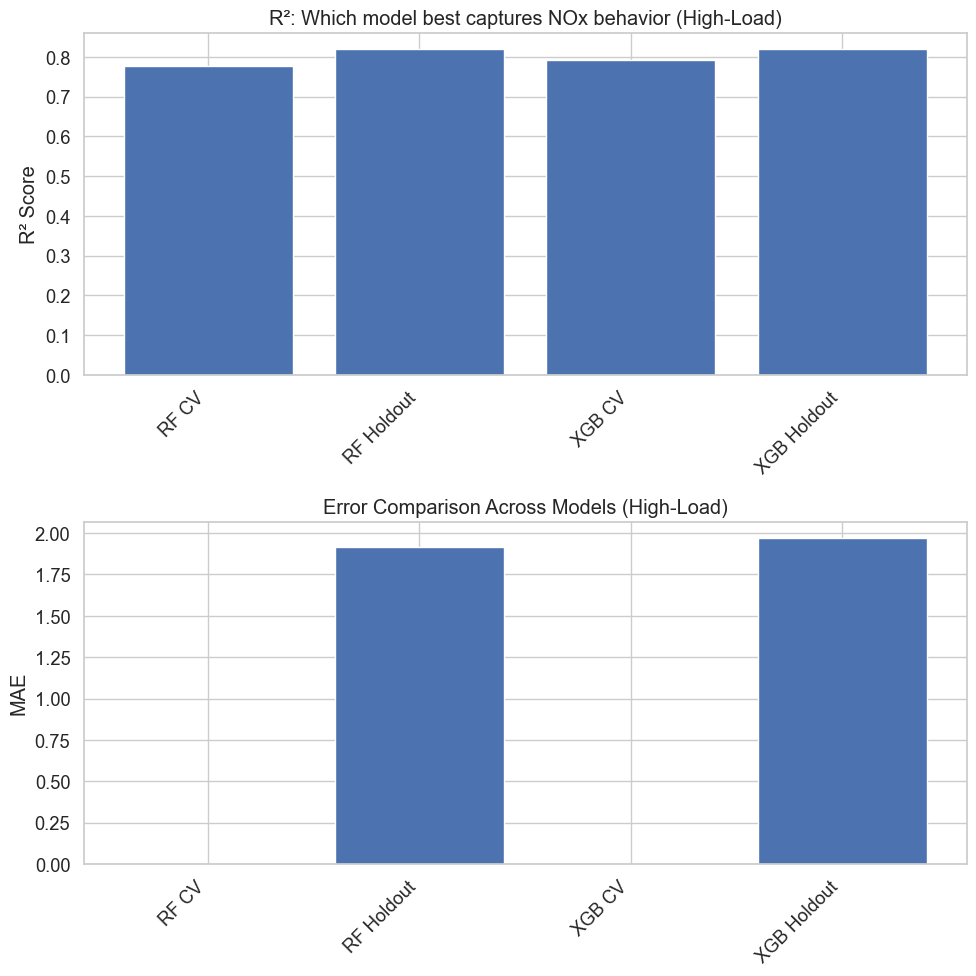

In [31]:
import matplotlib.pyplot as plt

# Data
models = ["RF CV", "RF Holdout", "XGB CV", "XGB Holdout"]
r2 = [0.777, 0.820, 0.792, 0.819]
mae = [0, 1.916, 0, 1.970]   # CV rows have no MAE → plot as 0

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# R² Bar Chart
axs[0].bar(models, r2)
axs[0].set_title("R²: Which model best captures NOx behavior (High-Load)")
axs[0].set_ylabel("R² Score")
axs[0].set_xticklabels(models, rotation=45, ha="right")

# MAE Bar Chart
axs[1].bar(models, mae)
axs[1].set_title("Error Comparison Across Models (High-Load)")
axs[1].set_ylabel("MAE")
axs[1].set_xticklabels(models, rotation=45, ha="right")

plt.tight_layout()
plt.show()


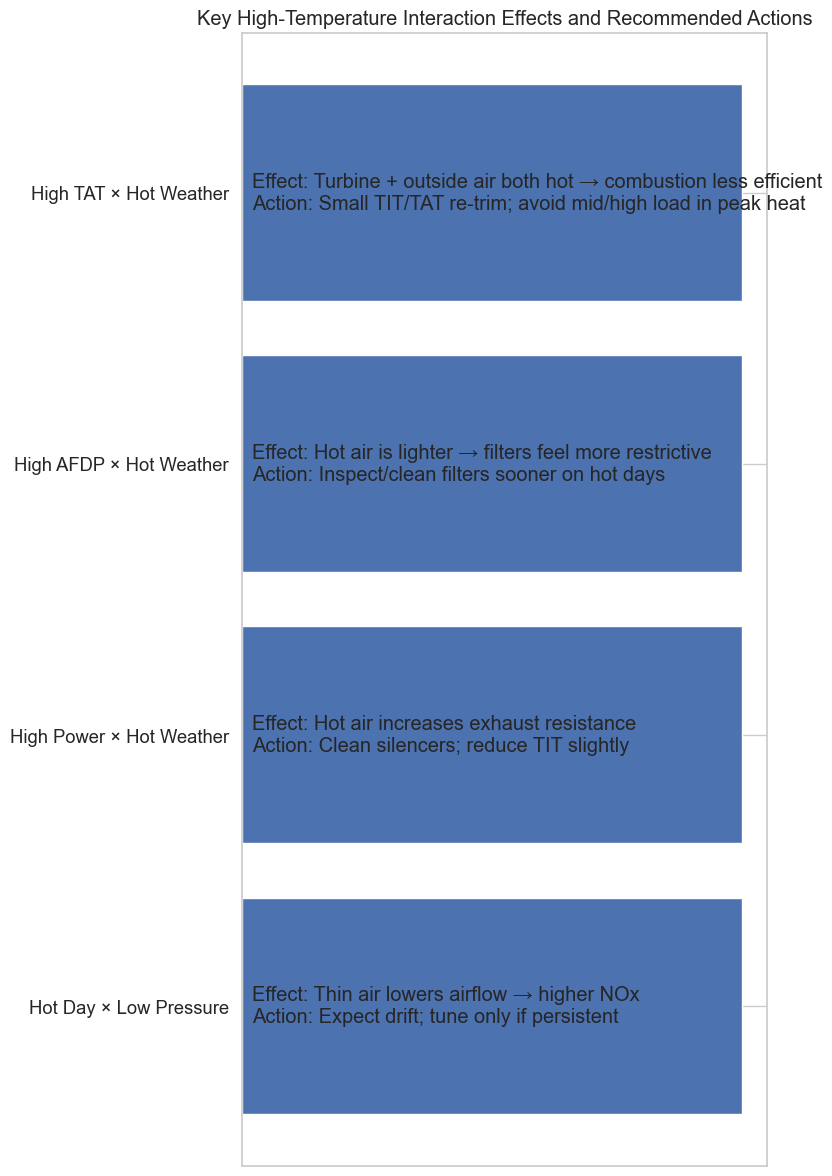

In [32]:
import matplotlib.pyplot as plt

# Relationships + actions
labels = [
    "High TAT × Hot Weather",
    "High AFDP × Hot Weather",
    "High Power × Hot Weather",
    "Hot Day × Low Pressure"
]

effects = [
    "Turbine + outside air both hot → combustion less efficient",
    "Hot air is lighter → filters feel more restrictive",
    "Hot air increases exhaust resistance",
    "Thin air lowers airflow → higher NOx"
]

actions = [
    "Small TIT/TAT re-trim; avoid mid/high load in peak heat",
    "Inspect/clean filters sooner on hot days",
    "Clean silencers; reduce TIT slightly",
    "Expect drift; tune only if persistent"
]

fig, ax = plt.subplots(figsize=(8, 12))  # Portrait orientation

y_pos = range(len(labels))

# Plot bars (all equal height, visual emphasis only)
ax.barh(y_pos, [1]*len(labels))  
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()

# Add annotations
for i, (eff, act) in enumerate(zip(effects, actions)):
    text = f"Effect: {eff}\nAction: {act}"
    ax.text(0.02, i, text, va='center', ha='left')

ax.set_title("Key High-Temperature Interaction Effects and Recommended Actions")
ax.set_xticks([])
ax.set_xlabel("")

plt.tight_layout()
plt.show()


In [33]:
import pandas as pd

data = {
    "Band": [
        "Full Load (All Data)",
        "Mid-Load (130–136)",
        "High-Load (160+)"
    ],
    "TIT": [
        "1054–1100°C",
        "1077–1094°C",
        "Fixed at limit (~1100°C)"
    ],
    "TAT": [
        "533–550°C",
        "549.6–550.3°C",
        "522–535°C"
    ],
    "CDP": [
        "10.4–12.2 bar",
        "11.55–12.35 bar",
        "13.88–14.47 bar"
    ],
    "GTEP": [
        "19.4–26.2 MW",
        "24.5–25.9 MW",
        "32.4–35.0 MW"
    ],
    "AFDP": [
        "2.94–4.34 inH₂O",
        "2.95–3.92 inH₂O",
        "3.82–4.34 inH₂O"
    ]
}

df = pd.DataFrame(data)
df


,Band,TIT,TAT,CDP,GTEP,AFDP
0,Full Load (All Data),1054–1100°C,533–550°C,10.4–12.2 bar,19.4–26.2 MW,2.94–4.34 inH₂O
1,Mid-Load (130–136),1077–1094°C,549.6–550.3°C,11.55–12.35 bar,24.5–25.9 MW,2.95–3.92 inH₂O
2,High-Load (160+),Fixed at limit (~1100°C),522–535°C,13.88–14.47 bar,32.4–35.0 MW,3.82–4.34 inH₂O
